##Preprocesing and clustering##

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Upload csv and describe

In [2]:
#Upload csv
df = pd.read_csv('abundance_ProteinGroups.csv')

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829 entries, 0 to 3828
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Protein IDs            3829 non-null   object 
 1   Protein names          3752 non-null   object 
 2   Gene names             3789 non-null   object 
 3   Fasta headers          3829 non-null   object 
 4   Peptides               3829 non-null   int64  
 5   Sequence coverage [%]  3829 non-null   float64
 6   Mol. weight [kDa]      3829 non-null   float64
 7   Q-value                3829 non-null   float64
 8   Intensity 1            3829 non-null   int64  
 9   Intensity 2            3829 non-null   int64  
 10  Intensity 3            3829 non-null   float64
 11  Intensity 4            3829 non-null   int64  
 12  Intensity 5            3829 non-null   float64
 13  Intensity 6            3829 non-null   float64
 14  Intensity 7            3829 non-null   float64
 15  Inte

,Peptides,Sequence coverage [%],Mol. weight [kDa],Q-value,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6,...,Intensity 39,Intensity 40,Intensity 41,Intensity 42,Intensity 43,Intensity 44,Intensity 45,Intensity 46,Intensity 47,Intensity 48
count,3829.000000,3829.000000,3829.000000,3829.000000,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03,...,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03,3.829000e+03
mean,10.994777,28.019796,65.837824,0.000670,9.960003e+07,2.470667e+08,6.831099e+08,5.151421e+07,3.169793e+08,2.189812e+08,...,1.715007e+08,1.819722e+08,1.615881e+08,2.423465e+08,2.801711e+08,4.471237e+08,2.353086e+07,1.346796e+08,2.247301e+08,3.496789e+08
std,16.608545,20.969144,88.585646,0.001791,1.061503e+09,2.478671e+09,6.006076e+09,7.349332e+08,3.967949e+09,2.338945e+09,...,1.797614e+09,2.037943e+09,1.482859e+09,2.208715e+09,3.057557e+09,3.705073e+09,2.805153e+08,1.527406e+09,2.006466e+09,2.710779e+09
min,1.000000,0.300000,3.969400,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000,10.000000,25.674000,0.000000,5.391000e+04,1.079900e+06,3.445000e+06,0.000000e+00,0.000000e+00,1.238600e+06,...,5.950900e+05,6.045700e+05,7.842700e+05,1.255300e+06,1.228200e+06,2.807800e+06,0.000000e+00,3.406700e+05,1.621900e+06,2.663200e+06
50%,6.000000,23.000000,44.863000,0.000000,1.721800e+06,7.297500e+06,2.387900e+07,5.419800e+05,3.274700e+06,7.404200e+06,...,4.988300e+06,5.127000e+06,5.272200e+06,8.261800e+06,9.272800e+06,1.664600e+07,8.643000e+04,3.024100e+06,8.691600e+06,1.588300e+07
75%,13.000000,42.800000,76.868000,0.000325,1.283500e+07,4.370400e+07,1.481400e+08,4.811500e+06,2.556000e+07,4.495300e+07,...,3.072100e+07,3.217700e+07,3.139100e+07,4.823400e+07,5.566200e+07,9.410900e+07,1.985400e+06,2.026300e+07,4.663800e+07,8.739500e+07
max,274.000000,97.300000,3014.000000,0.009941,3.624200e+10,8.950000e+10,2.075700e+11,2.883100e+10,1.640100e+11,1.025800e+11,...,5.717900e+10,7.049300e+10,4.334700e+10,6.797700e+10,1.417100e+11,1.129800e+11,1.136000e+10,6.178100e+10,5.498800e+10,7.446400e+10


In [4]:
#Check for duplication and missing values
df.duplicated().sum().any()
df.isnull().values.any()
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Protein names    77
Gene names       40
dtype: int64


In [5]:
#Check categorical values
for column in df.columns:
  if df[column].dtype == 'object':
    print(f"Unique categories in '{column}':")
    print(df[column].unique())
    print()

Unique categories in 'Protein IDs':
['P68871;F8W6P5;A0A0J9YWK4' 'P69905'
 'P49327;A0A0U1RQF0;A0A0U1RRG3;A0A1B0GTR5;J3KTF0' ... 'Q8IY21'
 'Q96NT5-2;Q96NT5' 'Q9UMX5']

Unique categories in 'Protein names':
['Hemoglobin subunit beta;LVV-hemorphin-7;Spinorphin'
 'Hemoglobin subunit alpha'
 'Fatty acid synthase;[Acyl-carrier-protein] S-acetyltransferase;[Acyl-carrier-protein] S-malonyltransferase;3-oxoacyl-[acyl-carrier-protein] synthase;3-oxoacyl-[acyl-carrier-protein] reductase;3-hydroxyacyl-[acyl-carrier-protein] dehydratase;Enoyl-[acyl-carrier-protein] reductase;Oleoyl-[acyl-carrier-protein] hydrolase'
 ... 'Probable ATP-dependent RNA helicase DDX60'
 'Proton-coupled folate transporter' 'Neudesin']

Unique categories in 'Gene names':
['HBB' 'HBA1' 'FASN' ... 'DDX60' 'SLC46A1' 'NENF']

Unique categories in 'Fasta headers':
['sp|P68871|HBB_HUMAN Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2;tr|F8W6P5|F8W6P5_HUMAN Hemoglobin subunit beta (Fragment) OS=Homo sapiens GN=HBB PE=1 SV

Exclude proteins with <=20% seq coverage and create a new dataset

In [6]:
#How many proteins are identified equal and under 20 % of sequence coverage?
proteins_low_coverage = df[df['Sequence coverage [%]'] <= 20]
count_low_coverage = proteins_low_coverage.shape[0]

print('Number of proteins with <= 20% sequence coverage:', count_low_coverage)
# Optionally, display the first few rows
#print(proteins_low_coverage.head())
print('done')

Number of proteins with <= 20% sequence coverage: 1740
done


In [7]:
#Exclude the <= 20% sequence coverage: 1740, create new dataset
df_exclude = df[df['Sequence coverage [%]'] > 20]
count_max20_coverage = df_exclude.shape[0]
print('Number of proteins with > 20% sequence coverage:', count_max20_coverage)

Number of proteins with > 20% sequence coverage: 2089


In [8]:
#subset for exclude dataframe contaiing only important labels
key_keep_cols = ['Protein IDs', 'Protein names', 'Gene names']  
intensity_cols = [col for col in df.columns if col.startswith('Intensity')]  

df_excludesub = df_exclude[key_keep_cols + intensity_cols]

#print the shape and first few rows as a check  
print("Exclude dataset shape:", df_excludesub.shape)  
#print("Preprocessed data preview:")  
#print(df_preprocessed.head())  
   
# Optionally, save the preprocessed dataframe for further analysis  
df_excludesub.to_csv('exclusesubset_proteomics.csv', index=False)  
print("excludesubset data saved as 'exclusesubset_proteomics.csv'") 

Exclude dataset shape: (2089, 51)
excludesubset data saved as 'exclusesubset_proteomics.csv'


apply Log2 because is DDA before imputation

In [9]:
#Copy and replace 0 per nan in intensity columns
df_log_exc = df_excludesub.copy()
df_log_exc[intensity_cols] = df_log_exc[intensity_cols].replace(0, np.nan)
df_log_exc[intensity_cols] = np.log2(df_log_exc[intensity_cols])

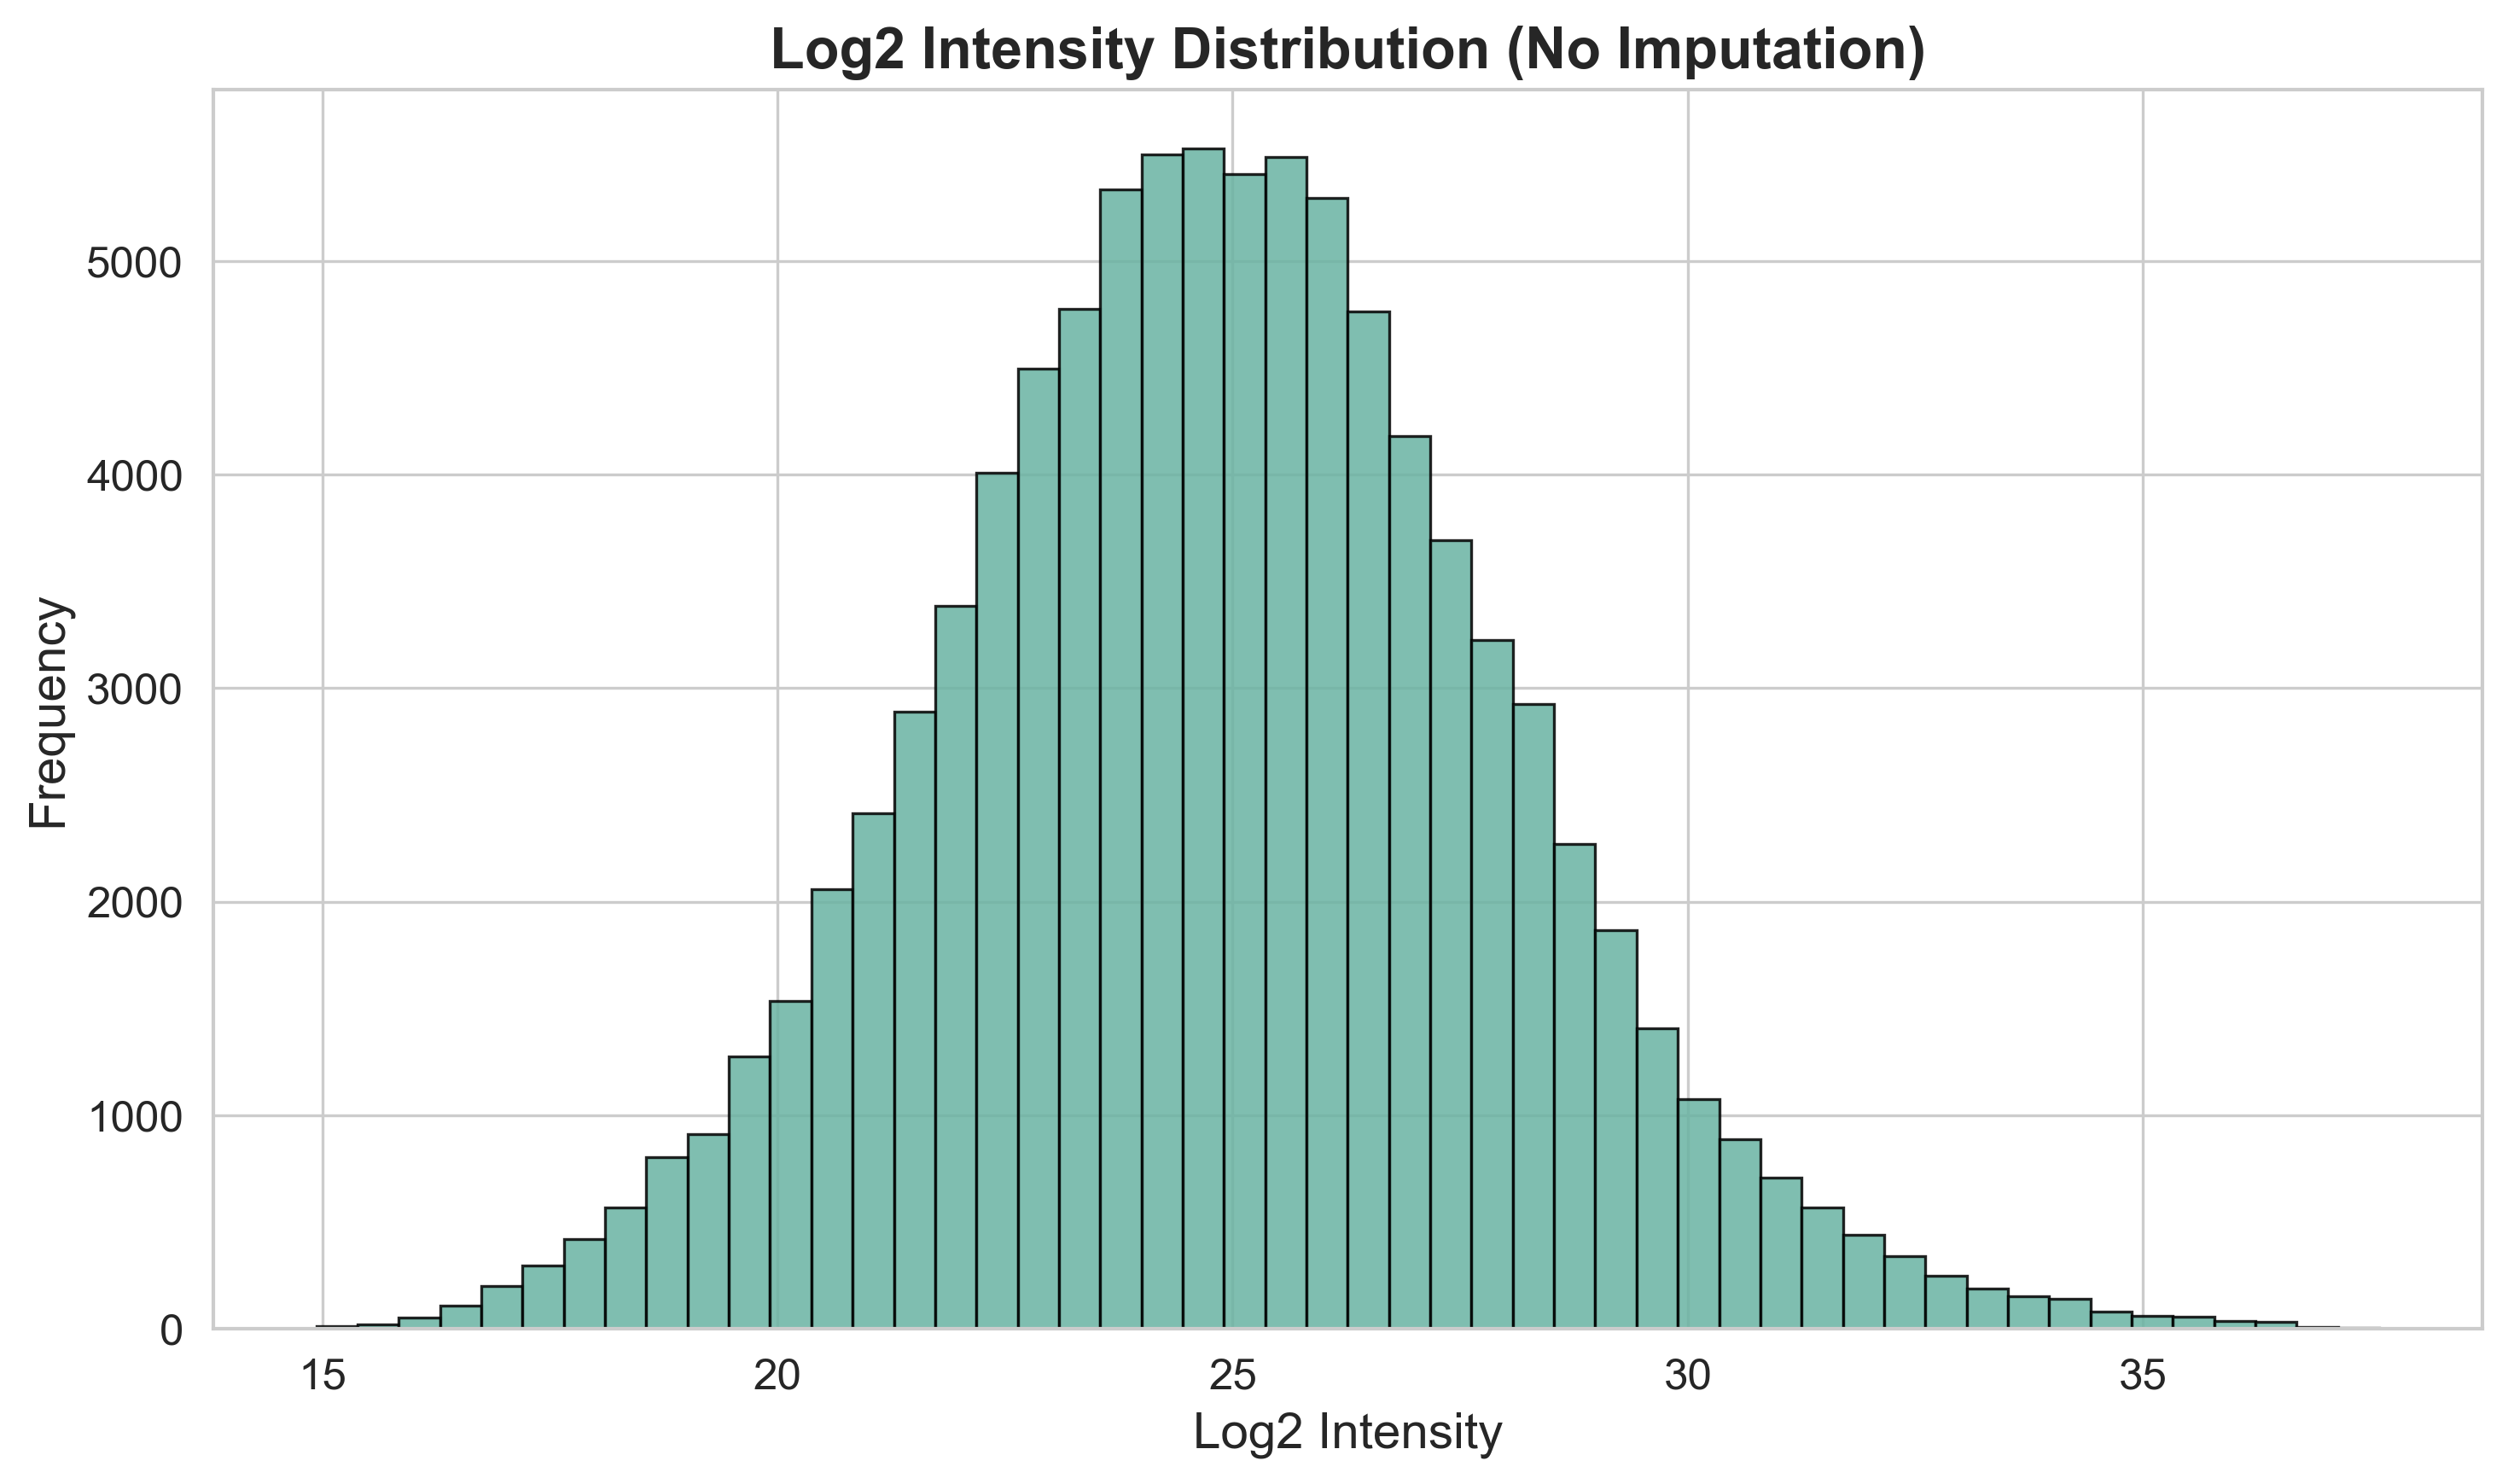

In [10]:
#Visualize distribution with Log2 before imputation
#plt.figure(figsize=(10, 5))
#plt.hist(df_log_exc[intensity_cols].stack(), bins=50, color='skyblue', edgecolor='black')
#plt.title('Log2 Intensity Distribution After Log2 None Imputation')
#plt.xlabel('Log2 Intensity')
#plt.ylabel('Count')
#plt.show()

#########Option 2 high quality graph
sns.set(style="whitegrid", context="paper", font_scale=1.4)
plt.figure(figsize=(10, 6), dpi=300)
plt.hist(df_log_exc[intensity_cols].stack(), bins=50, color='#69b3a2', edgecolor='black', alpha=0.85)
plt.title('Log2 Intensity Distribution (No Imputation)', fontsize=16, weight='bold')
plt.xlabel('Log2 Intensity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

Add Iterative imputation to df_log_exc

C:\Users\laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Remaining missing values: 0


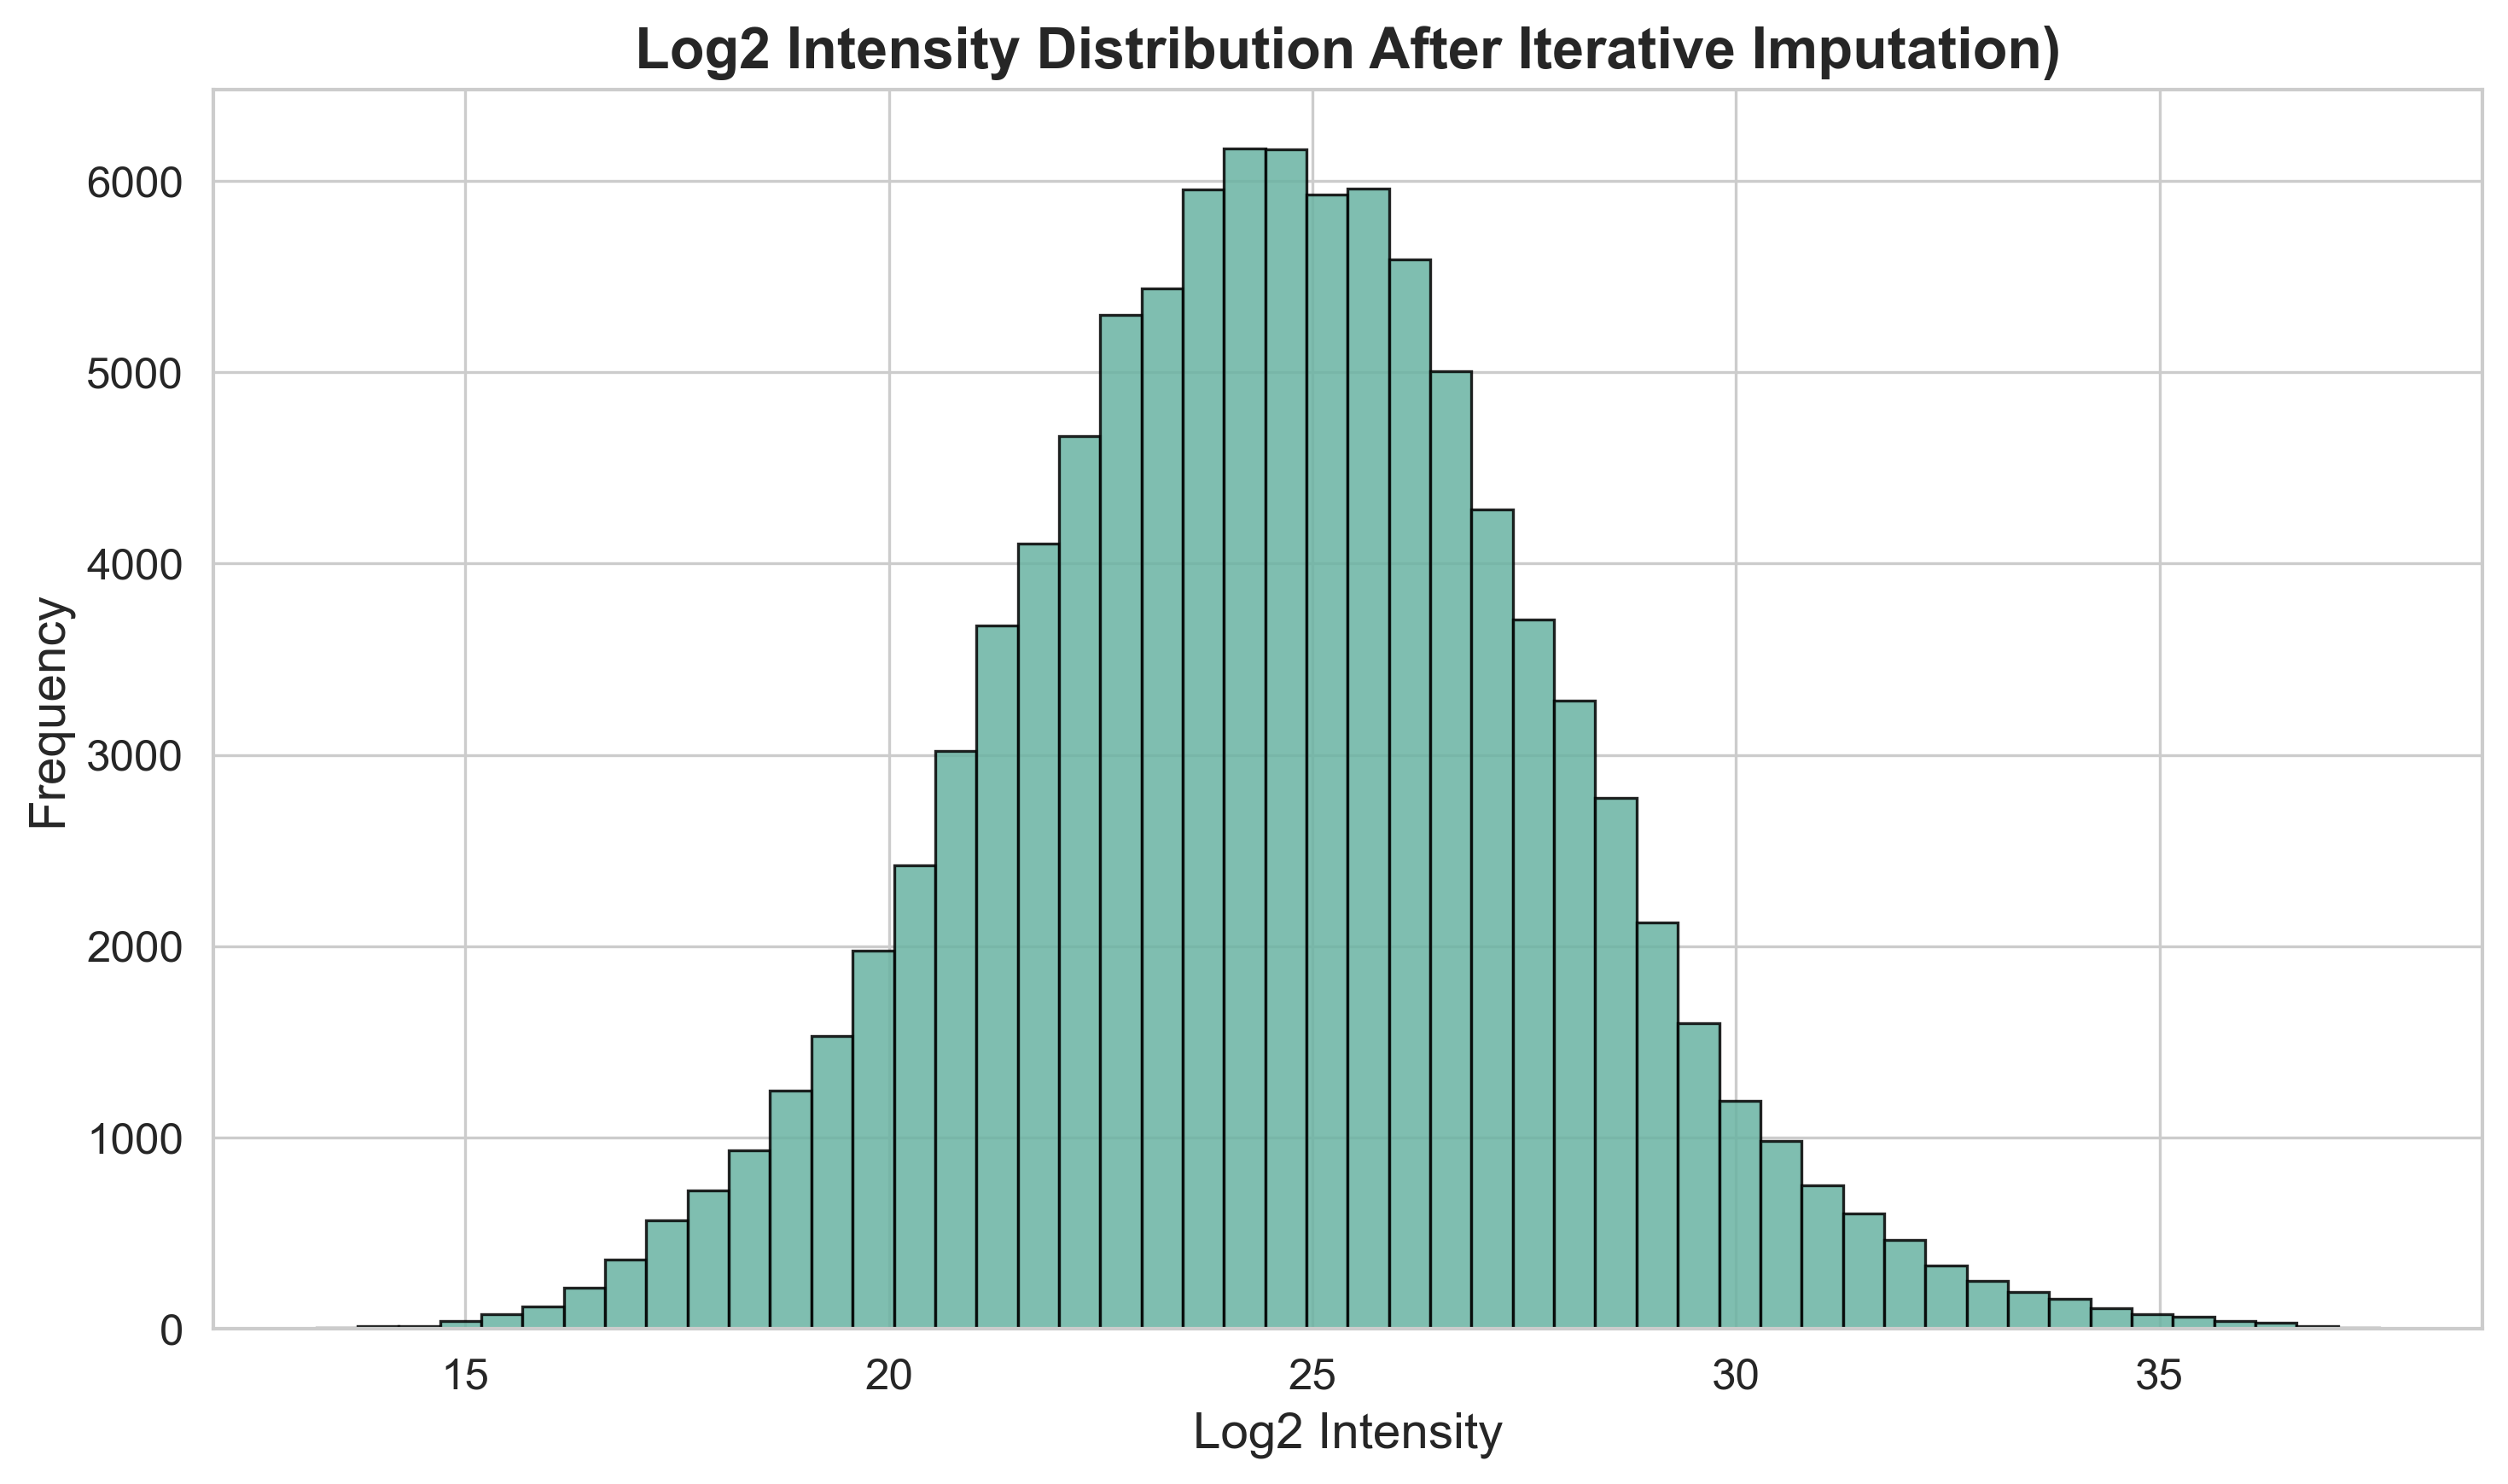

In [11]:
#Add Iterative Imputer to df_log_exc
df_log_exc_II = df_log_exc.copy()
intensity_cols = [col for col in df_log_exc_II.columns if col.startswith('Intensity')]
imputer = IterativeImputer(random_state=42)

#Fit and transform
df_log_exc_II[intensity_cols] = imputer.fit_transform(df_log_exc_II[intensity_cols])

#Check if there are any missing values left
print("Remaining missing values:", df_log_exc_II[intensity_cols].isnull().sum().sum())

#Visualization of distribution after imputation
sns.set(style="whitegrid", context="paper", font_scale=1.4)
plt.figure(figsize=(10, 6), dpi=300)
plt.hist(df_log_exc_II[intensity_cols].stack(), bins=50, color='#69b3a2', edgecolor='black', alpha=0.85)
plt.title('Log2 Intensity Distribution After Iterative Imputation)', fontsize=16, weight='bold')
plt.xlabel('Log2 Intensity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

Add StandardScaler() to df_log_exc_II

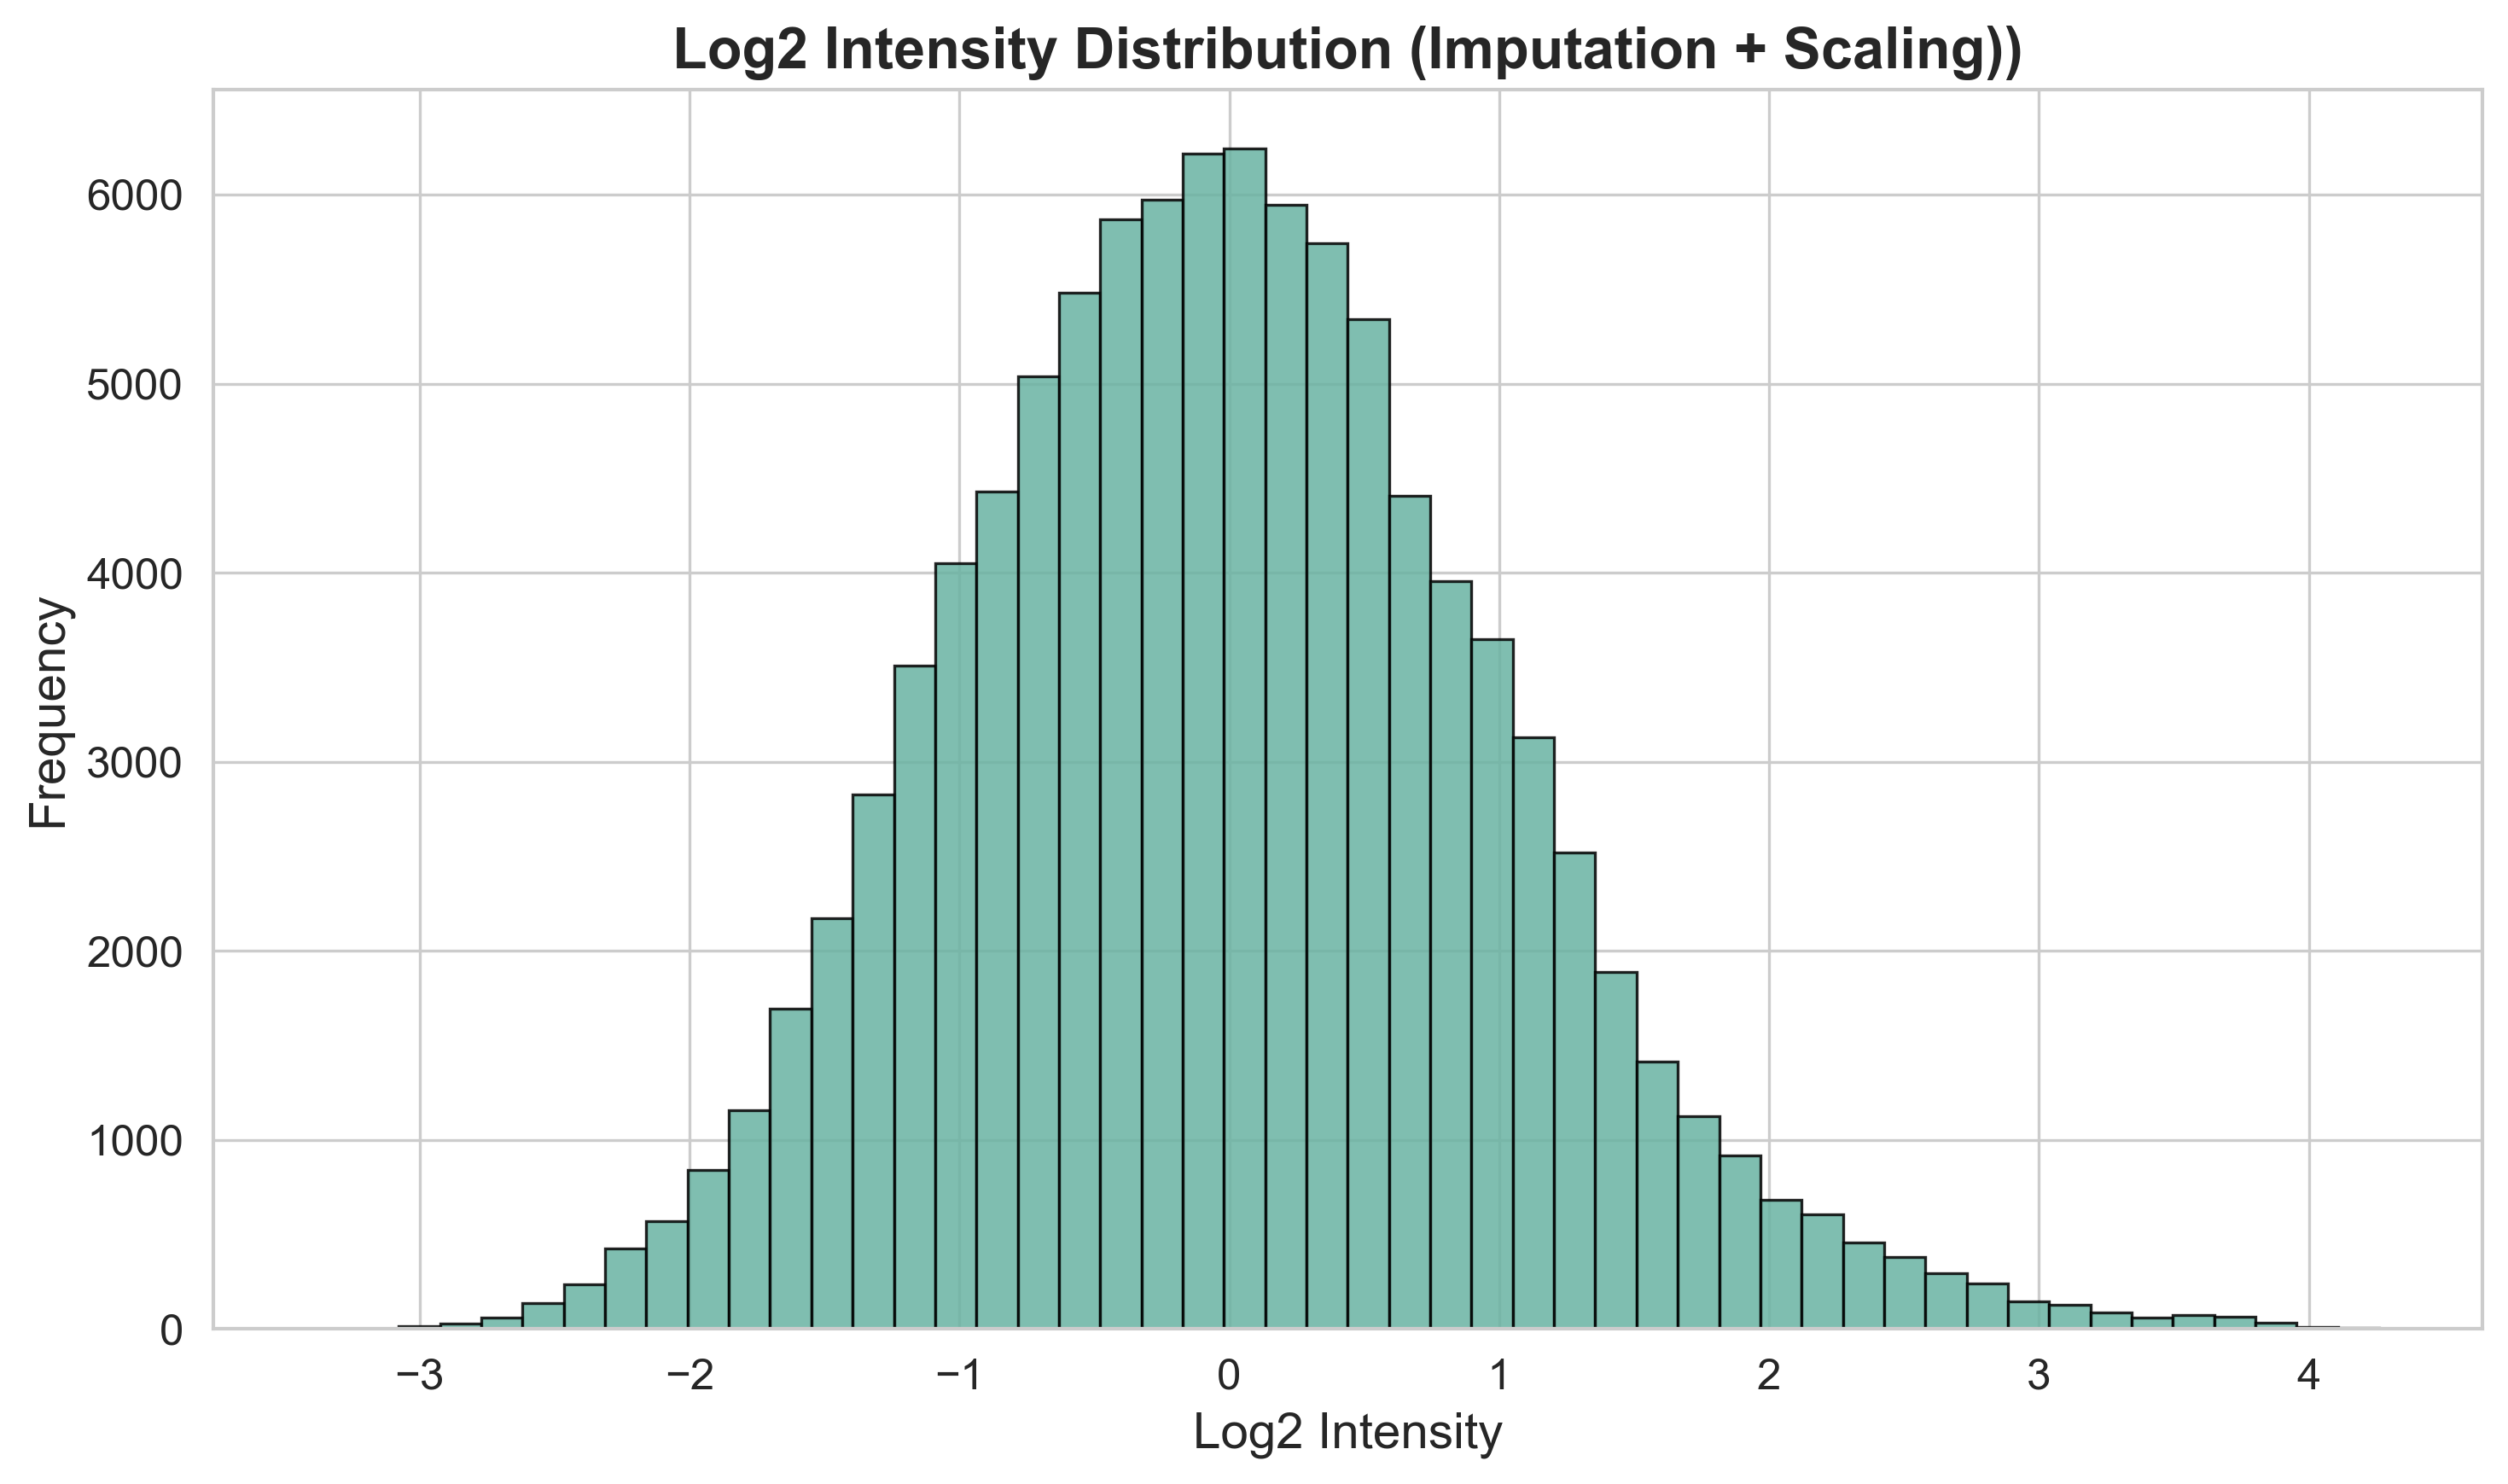

In [12]:
#add StandardScaler() to df_exc_II
# Create a copy of just the intensity data for normalization
intensity_data = df_log_exc_II[intensity_cols].copy()
std_scaler = StandardScaler()
df_log_exc_II_std = pd.DataFrame(std_scaler.fit_transform(intensity_data), columns=intensity_cols)

#Visualization of distribution after scaling
sns.set(style="whitegrid", context="paper", font_scale=1.4)
plt.figure(figsize=(10, 6), dpi=300)
plt.hist(df_log_exc_II_std[intensity_cols].stack(), bins=50, color='#69b3a2', edgecolor='black', alpha=0.85)
plt.title('Log2 Intensity Distribution (Imputation + Scaling))', fontsize=16, weight='bold')
plt.xlabel('Log2 Intensity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()


Reduction of dimensionality with UMAP tune df_exc_II_std

In [13]:
#UMAP installation
!pip install umap-learn
import umap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\laura\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
#Fit and transform df_exc_II_std
umap_tune = umap.UMAP(n_neighbors=50, min_dist=0.0, metric='cosine', n_components=2, random_state=42)
umap_tune.fit(df_log_exc_II_std)
df_log_exc_II_std_umap_tune = umap_tune.transform(df_log_exc_II_std)

C:\Users\laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


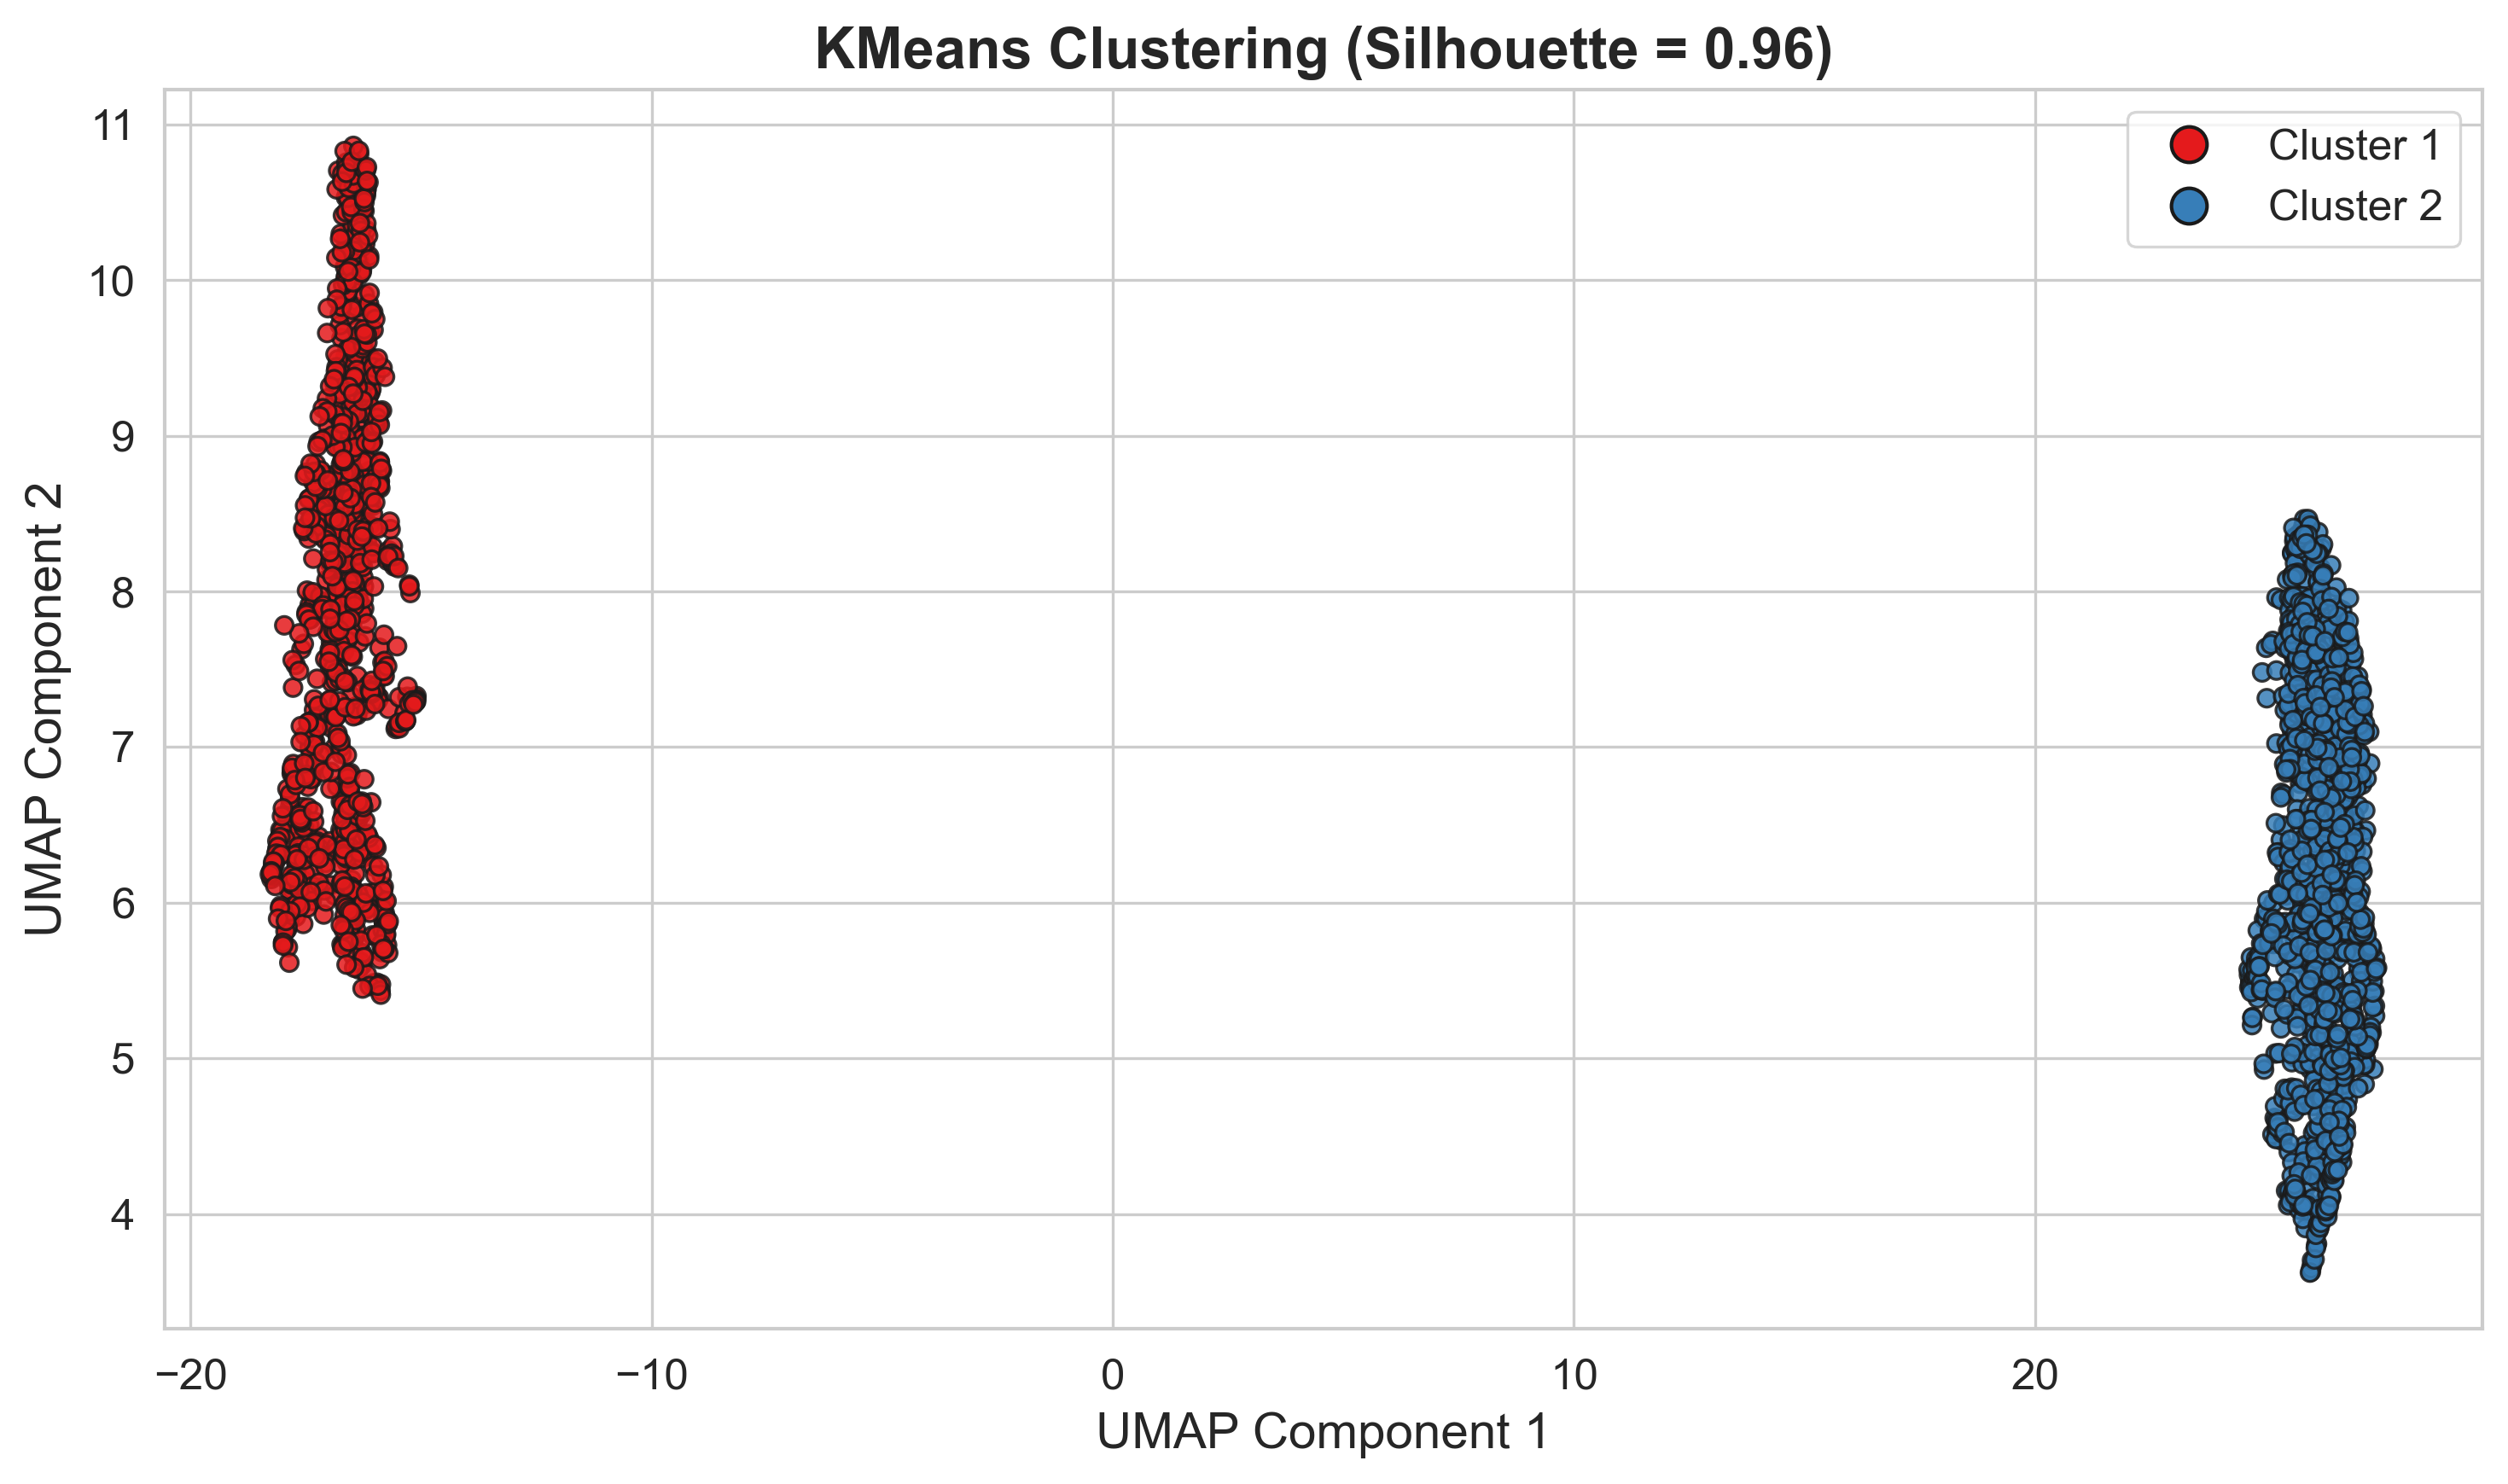

In [15]:
#Cluster visualizatio with Kmeans
# Fit KMeans
clustering_kmeans = KMeans(
    n_clusters=2, random_state=74, max_iter=500,
    init='k-means++', n_init='auto'
).fit(df_log_exc_II_std_umap_tune)

# Get cluster labels and silhouette score
cluster_labels = clustering_kmeans.labels_
score = silhouette_score(df_log_exc_II_std_umap_tune, cluster_labels)

# Plot
sns.set(style="whitegrid", context="paper", font_scale=1.4)
plt.figure(figsize=(10, 6), dpi=300)
palette = sns.color_palette("Set1", n_colors=2)
plt.scatter(
    df_log_exc_II_std_umap_tune[:, 0], df_log_exc_II_std_umap_tune[:, 1],
    s=25, c=[palette[label] for label in cluster_labels], edgecolor='k', alpha=0.85
)

plt.xlabel("UMAP Component 1", fontsize=14)
plt.ylabel("UMAP Component 2", fontsize=14)
plt.title(f"KMeans Clustering (Silhouette = {score:.2f})", fontsize=16, weight='bold')

#Legends
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}',
            markerfacecolor=palette[i], markersize=10, markeredgecolor='k') for i in range(2)]
plt.legend(handles=handles, loc='best')

plt.tight_layout()
plt.show()


In [16]:
#Save cluster plot
plt.savefig("umap_kmeans_clusters.png", dpi=600, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Create cluster label and merge with nitial dataframe

In [17]:
#Label the UMAP 1 and  2  for df_log_exc_II_umap_tune kmeans
cluster_labels_umap = clustering_kmeans.labels_

In [18]:
#Turn UMAP array into a DataFrame
df_umap_clustered = pd.DataFrame(df_log_exc_II_std_umap_tune, columns=['UMAP Component 1', 'UMAP Component 2'])
df_umap_clustered['cluster'] = cluster_labels_umap

In [19]:
#Merging df_log_exc_II_std and df_log_exc_II_std_umap_tune with aligned indices
df_clustered_full = df_log_exc_II_std.copy()
df_clustered_full['cluster'] = cluster_labels_umap

In [20]:
#Check head new dataframe
df_clustered_full.head()

,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6,Intensity 7,Intensity 8,Intensity 9,Intensity 10,...,Intensity 40,Intensity 41,Intensity 42,Intensity 43,Intensity 44,Intensity 45,Intensity 46,Intensity 47,Intensity 48,cluster
0,3.557506,3.842408,3.616321,3.601728,4.085157,3.740532,3.608285,3.553773,3.876880,3.663678,...,3.979473,3.711985,3.650261,3.469848,3.539822,3.811689,3.760113,3.670470,3.256835,0
1,3.679202,3.798395,3.642589,3.594440,3.742628,3.681099,3.612200,3.570626,3.933399,3.776456,...,3.835590,3.617269,3.624871,3.575146,3.507483,3.809062,3.724006,3.699555,3.368055,0
2,2.958916,3.152779,3.094560,3.067672,2.679775,4.007776,3.788047,3.039832,3.565322,3.615847,...,3.811617,3.563217,3.354065,3.941940,3.382648,3.578670,3.172930,3.216785,3.069596,0
3,3.830367,3.371418,2.951131,4.047587,3.707076,3.444410,3.534721,3.093060,3.333917,3.181646,...,3.827102,3.759623,3.648389,3.311713,3.192948,3.387469,3.523748,3.703569,3.513064,0
4,3.442190,3.619659,3.415071,3.492810,2.930879,3.110303,3.437835,3.495704,2.953833,3.566824,...,3.330162,3.260337,3.768091,3.459853,3.630576,4.018180,3.568601,3.649570,3.522506,0


In [56]:
#extract metadata from initial df_excludesub
metadata = df_excludesub[['Protein IDs', 'Protein names', 'Gene names']].copy()

In [67]:
#Combine metadata with df_clustered_full
df_grouped = pd.concat([metadata.reset_index(drop=True), df_clustered_full.reset_index(drop=True)], axis=1)

In [58]:
df_grouped.tail()

,Protein IDs,Protein names,Gene names,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6,Intensity 7,...,Intensity 40,Intensity 41,Intensity 42,Intensity 43,Intensity 44,Intensity 45,Intensity 46,Intensity 47,Intensity 48,cluster
2084,P01763,Ig heavy chain V-III region WEA,NaN,-1.549028e+00,-1.104589e+00,-1.258362e+00,-1.479425e+00,-1.303418e+00,-1.198663e+00,-1.390065e+00,...,-1.533074e+00,-1.802263e+00,-1.459216e+00,-1.058650e+00,-9.615834e-01,-1.160072e+00,-1.528301e+00,-1.440219e+00,-1.142526e+00,1
2085,D6RHJ6,NaN,JCHAIN,-1.837964e+00,-1.326147e+00,-8.988587e-01,-1.412030e+00,-1.296844e+00,-1.305241e+00,-1.336028e+00,...,-9.817629e-01,-1.331988e+00,-9.168343e-01,-6.209416e-01,-8.184080e-01,-7.578987e-01,-1.570853e+00,-1.213029e+00,-6.619362e-01,1
2086,K7EJ46-3;K7EJ46-2;K7EJ46,Small integral membrane protein 22,SMIM22,-4.957237e-01,-2.466596e-01,2.278790e-03,-5.527866e-01,-5.274691e-01,-1.313456e-01,-2.188267e-01,...,-1.616902e-01,-3.542379e-01,-2.958391e-01,-9.992323e-02,-1.096701e-01,-2.255583e-01,-1.448557e+00,-2.924358e-01,-1.244104e-01,1
2087,E7EUI8;E7EM57,Glucose-6-phosphate 1-dehydrogenase,G6PD,4.600014e-14,5.067674e-14,2.752966e-14,5.535377e-14,7.834565e-15,6.184517e-14,3.230576e-14,...,2.840099e-14,-2.111330e-14,6.347072e-14,9.081630e-14,7.939296e-14,7.585455e-14,2.873808e-14,2.637642e-14,1.036585e-13,0
2088,P06396-3;A0A0U1RQL8,Gelsolin,GSN,4.715014e-14,5.067674e-14,2.752966e-14,5.535377e-14,8.953789e-15,6.060826e-14,3.230576e-14,...,2.840099e-14,-1.987134e-14,6.471524e-14,9.320621e-14,7.817153e-14,7.698671e-14,2.993550e-14,2.637642e-14,1.024245e-13,0


In [68]:
#save the df_grouped
df_grouped.to_csv('groupedUMAP_proteomics.csv', index=False)  
print("groupedUMAP data saved as 'groupedUMAP_proteomics.csv'")

groupedUMAP data saved as 'groupedUMAP_proteomics.csv'


##Diferential Expression analysis##

In [69]:
df_grouped["cluster"]

0       0
1       0
2       0
3       0
4       0
       ..
2084    1
2085    1
2086    1
2087    0
2088    0
Name: cluster, Length: 2089, dtype: int32

In [70]:
print(df_grouped.columns.tolist())  # confirm it now includes "cluster"


['Protein IDs', 'Protein names', 'Gene names', 'Intensity 1', 'Intensity 2', 'Intensity 3', 'Intensity 4', 'Intensity 5', 'Intensity 6', 'Intensity 7', 'Intensity 8', 'Intensity 9', 'Intensity 10', 'Intensity 11', 'Intensity 12', 'Intensity 13', 'Intensity 14', 'Intensity 15', 'Intensity 16', 'Intensity 17', 'Intensity 18', 'Intensity 19', 'Intensity 20', 'Intensity 21', 'Intensity 22', 'Intensity 23', 'Intensity 24', 'Intensity 25', 'Intensity 26', 'Intensity 27', 'Intensity 28', 'Intensity 29', 'Intensity 30', 'Intensity 31', 'Intensity 32', 'Intensity 33', 'Intensity 34', 'Intensity 35', 'Intensity 36', 'Intensity 37', 'Intensity 38', 'Intensity 39', 'Intensity 40', 'Intensity 41', 'Intensity 42', 'Intensity 43', 'Intensity 44', 'Intensity 45', 'Intensity 46', 'Intensity 47', 'Intensity 48', 'cluster']


In [62]:
group_0 = df_grouped[df_grouped["cluster"] == 0].reset_index(drop=True)
group_1 = df_grouped[df_grouped["cluster"] == 1].reset_index(drop=True)

In [77]:
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as smm

# Step 1: Make sure the data is correctly prepared
intensity_cols = [col for col in df.columns if col.startswith("Intensity")]
df_grouped = df_grouped.copy()  # if not already

# Step 2: Choose two groups (you can change the values below)
group_0_label = 0
group_1_label = 1

group_0 = df_grouped[df_grouped["cluster"] == group_0_label].reset_index(drop=True)
group_1 = df_grouped[df_grouped["cluster"] == group_1_label].reset_index(drop=True)

# Step 3: Match rows by index and calculate DE per row
results = []

for i in range(min(len(group_0), len(group_1))):
    row_0 = group_0.iloc[i]
    row_1 = group_1.iloc[i]

    # Ensure IDs match (this is optional but useful if the same proteins appear in both)
    protein_id = row_0["Protein IDs"]
    gene_name = row_0["Gene names"]

    vals0 = row_0[intensity_cols].dropna().values.astype(float)
    vals1 = row_1[intensity_cols].dropna().values.astype(float)

    if len(vals0) >= 2 and len(vals1) >= 2:
        tstat, pval = ttest_ind(vals0, vals1, equal_var=False)
        log2fc = np.mean(vals1) - np.mean(vals0)
    else:
        tstat, pval, log2fc = np.nan, np.nan, np.nan

    results.append([protein_id, gene_name, log2fc, pval])

# Step 4: Create result DataFrame and adjust p-values
results_df = pd.DataFrame(results, columns=["Protein ID", "Gene name", "log2FC", "p-value"])
results_df["adj-p"] = smm.multipletests(results_df["p-value"], method="fdr_bh")[1]

# Step 5: View significant proteins
significant = results_df[results_df["adj-p"] < 0.05]


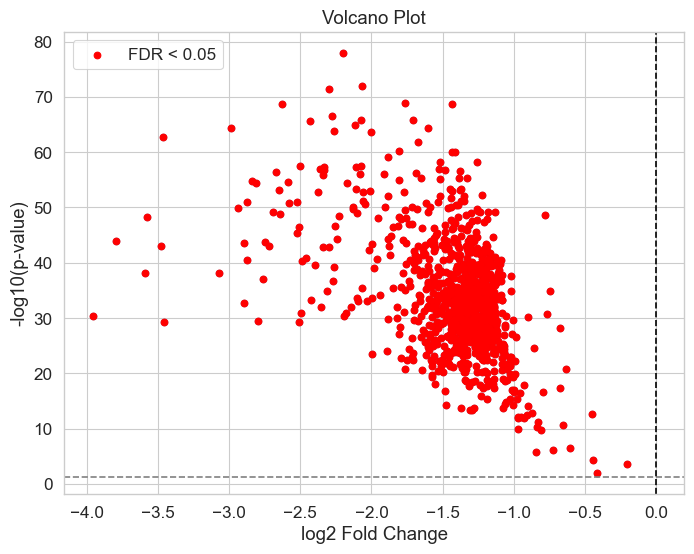

In [78]:
import matplotlib.pyplot as plt

# Drop rows with NaNs
volcano = results_df.dropna(subset=["log2FC", "p-value"])

# Compute -log10 p-value
volcano["neg_log10_pval"] = -np.log10(volcano["p-value"])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(volcano["log2FC"], volcano["neg_log10_pval"], alpha=0.6)

# Highlight significant ones
sig = volcano["adj-p"] < 0.05
plt.scatter(volcano[sig]["log2FC"], volcano[sig]["neg_log10_pval"], color='red', label='FDR < 0.05')

plt.axhline(-np.log10(0.05), color='gray', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot")
plt.legend()
plt.show()


In [79]:
log2FC = mean(group_1) - mean(group_0)

NameError: name 'mean' is not defined

In [25]:
#Libraries for DEA
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [27]:
#Annotate intensity columns
intensity_cols = [col for col in df.columns if col.startswith("Intensity")]
group_labels = df_grouped['cluster']

In [29]:
#Merge the intensity columns per cluster
group_0 = df_grouped[group_labels == 0][intensity_cols]
group_1 = df_grouped[group_labels == 1][intensity_cols]

In [31]:
#T-test per protein (no valid iloc
#results = []
#for i in range(df_grouped.shape[0]):
#    protein_id = df_grouped.iloc[:,:-1]['Protein IDs']
#    gene_name = df_grouped.iloc[:,:-1]['Gene names']
    
#    vals0 = group_0.iloc[:,:-1].dropna()
#    vals1 = group_1.iloc[:,:-1].dropna()
    
#    if len(vals0) >= 2 and len(vals1) >= 2:  # ensure enough values
#        tstat, pval = ttest_ind(vals0, vals1, equal_var=False)
#        log2fc = np.mean(vals1) - np.mean(vals0)
#    else:
#        tstat, pval, log2fc = np.nan, np.nan, np.nan
    
#    results.append([protein_id, gene_name, log2fc, pval])

In [32]:
#Create a dataframe with annotations
de_results = pd.DataFrame(results, columns=["Protein IDs", "Gene names", "log2FC", "p-value"])

In [35]:
#Multiple testing correction (FDR)
de_results['adj_p-value'] = multipletests(de_results['p-value'], method='fdr_bh').all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()